<a href="https://colab.research.google.com/github/sunshineluyao/CV_ML/blob/master/Kmeans/Robust_Volatility/BTC_Robustness_Clustering90volatility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd 
import numpy as np

In [8]:
###show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [18]:
df=pd.read_csv('https://raw.githubusercontent.com/sunshineluyao/Fintech_AI/master/data/btc_Kmeans_2020_07_05.csv')
df.head()

,Unnamed: 0,BlkCnt,IssTotNtv,SplyCur,TxTfrValAdjUSD,CapMrktCurUSD,NVTAdj90,PriceUSD,FeeTotUSD,IssTotUSD,AdrActCnt,Volume,Type,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1year,1-2year,2-3year,3-5year,>5year,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Five-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,Token Utility_volatility,PU Ratio_volatility,PU_future90d,NVTAdj90_future90d,PM_future90d,PriceChange30d,PriceChange60d,PriceChange90d,PriceChange180d,future30d_ROI,future60d_ROI,future90d_ROI,future180d_ROI
0,2009-01-03,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-04,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-05,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-06,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-07,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#set "date" column as the index
df.set_index('Unnamed: 0', inplace=True)
#to remove the name of the index
df.index.name=None
df.tail()

,BlkCnt,IssTotNtv,SplyCur,TxTfrValAdjUSD,CapMrktCurUSD,NVTAdj90,PriceUSD,FeeTotUSD,IssTotUSD,AdrActCnt,Volume,Type,Annualized_DilutionRate,Total daily transaction volume,Velocity,The daily revenue of bitcoin miners,The accumulated revenue of bitcoin miners,P/E Ratio,Metcalfe,PM,<1year,1-2year,2-3year,3-5year,>5year,One-year staking ratio,Two-year staking ratio,Three-year staking ratio,Five-year staking ratio,Token Utility,PU Ratio,volatility30,volatility60,volatility90,volatility180,Token Utility_volatility,PU Ratio_volatility,PU_future90d,NVTAdj90_future90d,PM_future90d,PriceChange30d,PriceChange60d,PriceChange90d,PriceChange180d,future30d_ROI,future60d_ROI,future90d_ROI,future180d_ROI
2020-06-28,150.0,937.50,1.841734e+07,1.044929e+09,1.677464e+11,84.965505,9108.065675,178764.564868,8.538812e+06,686270.0,1.456087e+10,BTC,1.883975,1.560580e+10,21.670843,8.717576e+06,1.854689e+10,52.718677,4.709665e+11,1.933909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027537,0.031297,0.033409,0.033409,NaN,NaN,NaN,NaN,NaN,-3.438650,3.951551,41.497578,27.076373,NaN,NaN,NaN,NaN
2020-06-29,145.0,906.25,1.841825e+07,1.825444e+09,1.691578e+11,85.628193,9184.247366,308429.074080,8.323224e+06,962232.0,1.646055e+10,BTC,1.879341,1.828599e+10,21.383505,8.631653e+06,1.855552e+10,53.691440,9.258904e+11,0.991937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027077,0.031259,0.033407,0.033407,NaN,NaN,NaN,NaN,NaN,-5.235760,6.146684,42.781408,28.081423,NaN,NaN,NaN,NaN
2020-06-30,147.0,918.75,1.841917e+07,2.063592e+09,1.684243e+11,84.979256,9143.967585,407570.997824,8.401020e+06,926238.0,1.573580e+10,BTC,1.878009,1.779939e+10,21.318103,8.808591e+06,1.856433e+10,52.384807,8.579168e+11,1.065834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026666,0.031133,0.033284,0.033284,NaN,NaN,NaN,NaN,NaN,-3.073754,3.257085,37.645885,31.628006,NaN,NaN,NaN,NaN
2020-07-01,162.0,1012.50,1.842018e+07,2.197590e+09,1.702271e+11,85.716151,9241.339612,573024.429645,9.356856e+06,1078007.0,1.597155e+10,BTC,1.889464,1.816914e+10,20.887828,9.929881e+06,1.857426e+10,46.966900,1.162099e+12,0.795228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021887,0.031114,0.033233,0.033233,NaN,NaN,NaN,NaN,NaN,-9.390948,2.941402,36.047259,26.328760,NaN,NaN,NaN,NaN
2020-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.633892e+10,BTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.018210,0.031087,0.033219,0.033219,NaN,NaN,NaN,NaN,NaN,-2.849002,3.872675,36.870157,25.849557,NaN,NaN,NaN,NaN


In [20]:
import matplotlib.pyplot as plt
print(plt.style.available)
####Check different styles here: https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
plt.style.use('seaborn-bright')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [21]:
df['PUv_future90d']=df['PU Ratio_volatility'].shift(-90)

In [22]:
df_90=df[['PU Ratio_volatility','PUv_future90d','future90d_ROI']]

In [23]:
df_90=df_90.dropna()

In [24]:
df_90.head()

,PU Ratio_volatility,PUv_future90d,future90d_ROI
2010-10-16,0.536292,3.282691,296.029709
2010-10-17,0.553617,3.016251,278.431373
2010-10-18,0.545923,3.003057,277.724609
2010-10-19,0.493161,2.447416,258.296568
2010-10-20,0.448490,1.924354,216.151515


In [25]:
from sklearn.cluster import KMeans

In [26]:
### We cluster the data by PU today and after n days
model = KMeans(n_clusters=4, random_state=5)
model.fit(df_90[['PU Ratio_volatility','PUv_future90d']])
labels90 = model.predict(df_90[['PU Ratio_volatility','PUv_future90d']])
labels90.reshape(-1,1)
df_90['labels90']=labels90
df_90.head()

,PU Ratio_volatility,PUv_future90d,future90d_ROI,labels90
2010-10-16,0.536292,3.282691,296.029709,1
2010-10-17,0.553617,3.016251,278.431373,1
2010-10-18,0.545923,3.003057,277.724609,1
2010-10-19,0.493161,2.447416,258.296568,1
2010-10-20,0.448490,1.924354,216.151515,1


In [27]:
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids=pd.DataFrame(centroids)
centroids.columns=['centroids_x','centroids_y']
centroids.head()

,centroids_x,centroids_y
0,490.219185,107.781138
1,19.101869,19.135569
2,52.081115,424.560465
3,125.530300,104.048855


In [28]:
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

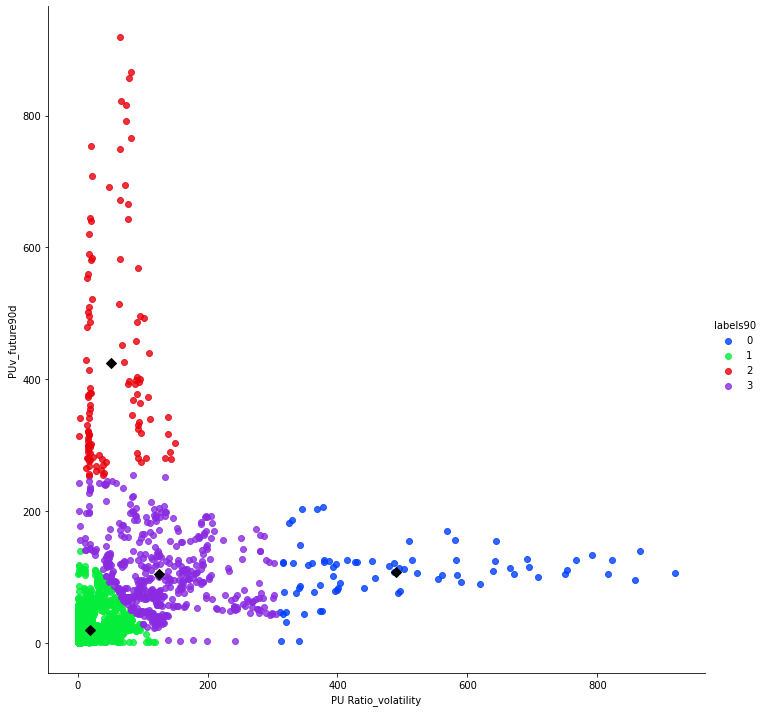

In [29]:
plt.figure(figsize=(14, 10))
sns.lmplot('PU Ratio_volatility','PUv_future90d', data=df_90, hue='labels90', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.savefig('PU90v_full')

In [30]:
df_90_ROI=df_90[['future90d_ROI','labels90']].groupby('labels90', as_index=False).agg(['min', 'max','mean','std'])
df_90_ROI.columns = ["_".join(x) for x in df_90_ROI.columns.ravel()]
df_90_ROI.index.name=None
df_90_ROI.head()

,future90d_ROI_min,future90d_ROI_max,future90d_ROI_mean,future90d_ROI_std
0,-76.415609,5.363777,-39.845541,17.281569
1,-83.710800,2258.089533,85.597525,257.505982
2,103.261022,3171.652729,456.257691,405.338627
3,-72.231406,2602.078891,40.701058,219.987163


In [31]:
df90_PU=df_90[['PU Ratio_volatility','PUv_future90d','labels90']].groupby('labels90').agg(['min', 'max','mean','std'])
df90_PU=df90_PU.transpose()
df90_PU

labels90                           0           1           2           3
PU Ratio_volatility min   310.958595    0.448490    2.790278    2.877873
                    max   919.765416  118.645687  150.483995  305.706206
                    mean  490.219185   19.101869   52.081115  125.530300
                    std   163.066064   19.965225   39.396311   66.898726
PUv_future90d       min     2.403662    0.466801  253.235210    2.356171
                    max   205.574152  139.244937  919.765416  254.830793
                    mean  107.781138   19.135569  424.560465  104.048855
                    std    39.675107   19.930635  166.859909   54.031081

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x720 with 0 Axes>

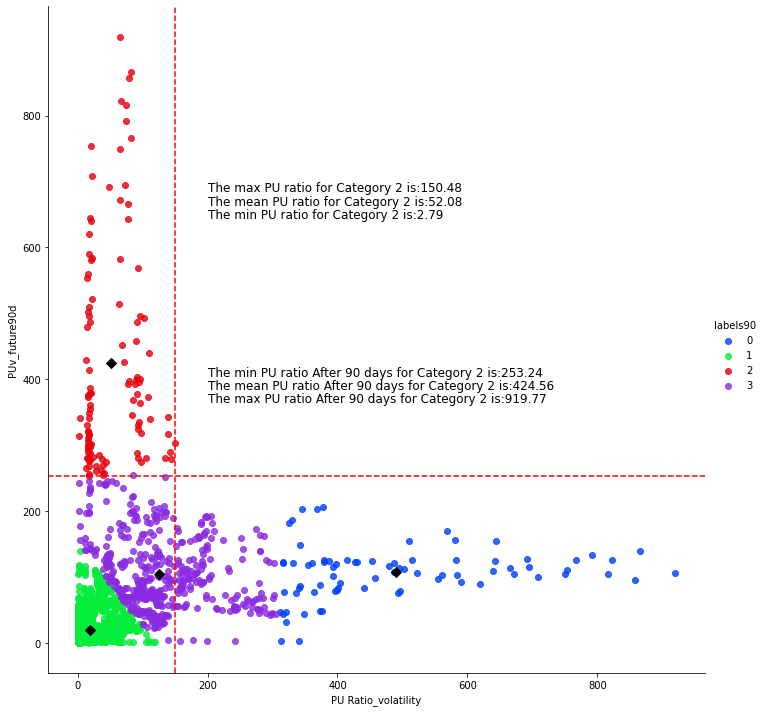

In [38]:
plt.figure(figsize=(14, 10))
sns.lmplot('PU Ratio_volatility','PUv_future90d', data=df_90, hue='labels90', fit_reg=False, legend=True,size=10)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, color='black')
plt.axvline(150.48, color='red', linestyle='--')
plt.axhline(253.24, color='red', linestyle='--')
plt.annotate('The max PU ratio for Category 2 is:150.48',
            xy=(200, 700), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.annotate('The mean PU ratio for Category 2 is:52.08',
            xy=(200, 680), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.annotate('The min PU ratio for Category 2 is:2.79',
            xy=(200, 660), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)

plt.annotate('The max PU ratio After 90 days for Category 2 is:919.77',
            xy=(200, 380), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.annotate('The mean PU ratio After 90 days for Category 2 is:424.56',
            xy=(200, 400), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.annotate('The min PU ratio After 90 days for Category 2 is:253.24',
            xy=(200, 420), 
            horizontalalignment='left', verticalalignment='top',fontsize=12)
plt.savefig('PU90v_full_annoted')

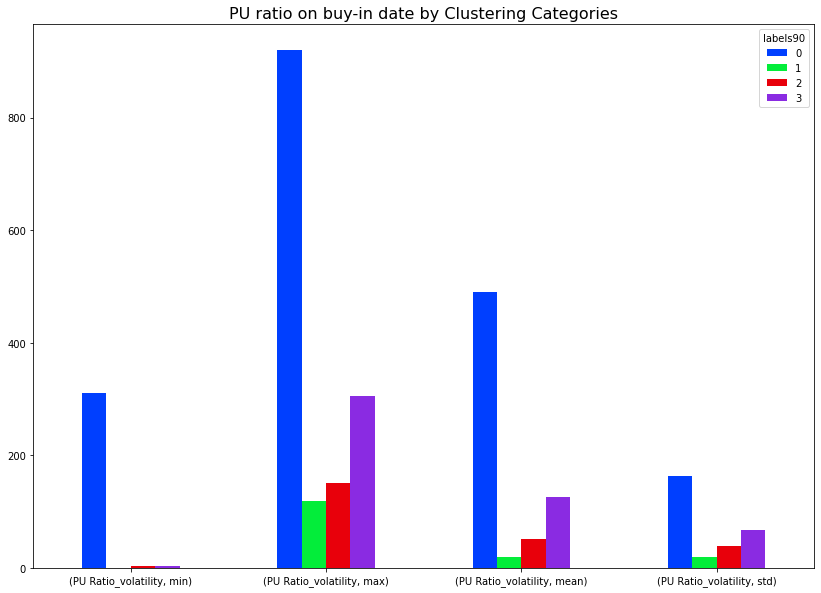

In [39]:
df90_PU.iloc[0:4].plot(kind='bar',figsize=(14, 10))
plt.title('PU ratio on buy-in date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('90PUv_full_buyin')

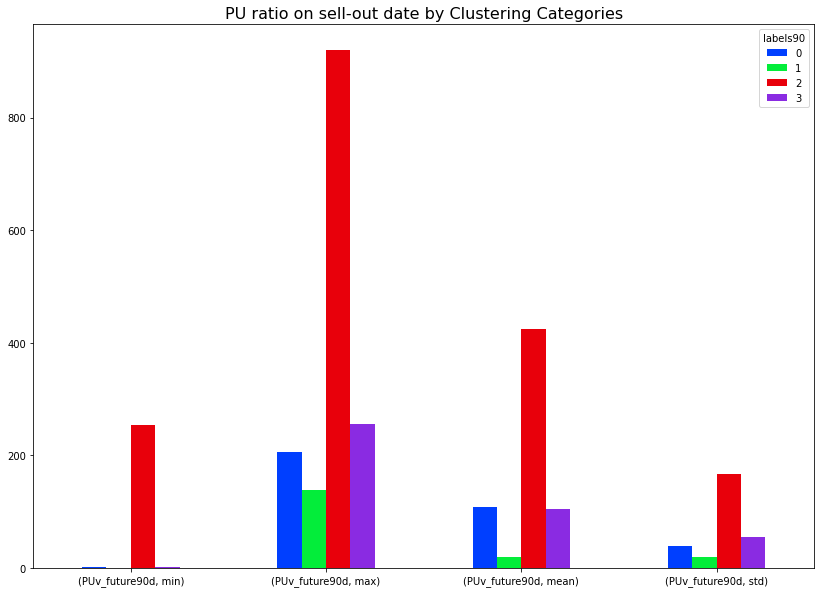

In [40]:
df90_PU.iloc[4:8].plot(kind='bar',figsize=(14, 10))
plt.title('PU ratio on sell-out date by Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('90PUv_full_sellout')

In [41]:
df_90_ROI=df_90_ROI.transpose()
df_90_ROI.columns=['labels90=0', 'labels90=1','labels90=2', 'labels90=3']
df_90_ROI.head()

,labels90=0,labels90=1,labels90=2,labels90=3
labels90=0,-76.415609,5.363777,-39.845541,17.281569
labels90=1,-83.710800,2258.089533,85.597525,257.505982
labels90=2,103.261022,3171.652729,456.257691,405.338627
labels90=3,-72.231406,2602.078891,40.701058,219.987163


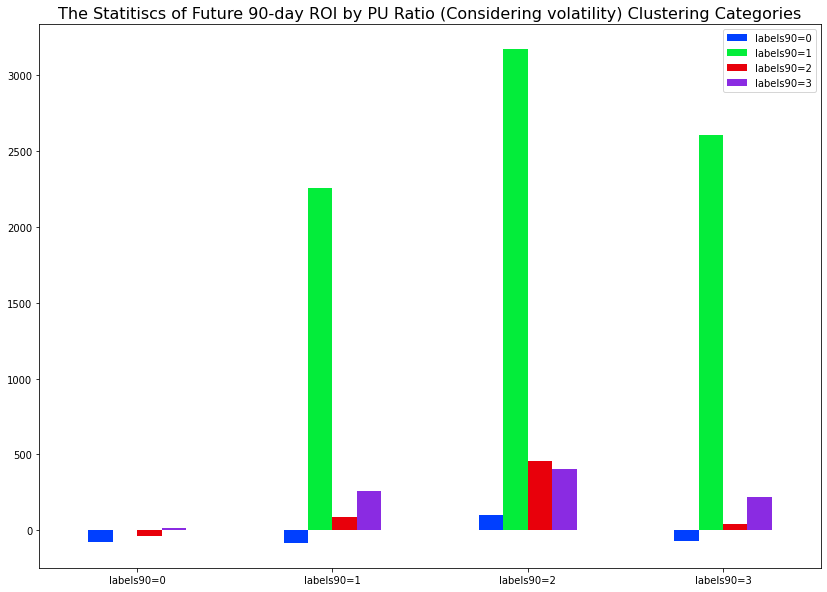

In [42]:
df_90_ROI.plot(kind='bar',figsize=(14, 10))
plt.title('The Statitiscs of Future 90-day ROI by PU Ratio (Considering volatility) Clustering Categories',fontsize=16)
plt.xticks(rotation=360)
plt.savefig('90vROI_full')

In [43]:
df.to_csv('btc_Kmeans_Robust_volatility_2020_07_06.csv')